<a href="https://colab.research.google.com/github/shyamjith94/data-science-tips/blob/data-cleaning/DataClening_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
movies = pd.read_csv("movies.csv")
rating = pd.read_csv("ratings.csv")

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
data = pd.merge(movies, rating, on="movieId")
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [ ]:
data.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [ ]:
data.drop(["userId", "timestamp", "movieId"], inplace=True, axis=1)

In [ ]:
data = pd.pivot_table(data, index=["title", "genres"], aggfunc="mean")
data.head()

,,rating
title,genres,
'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
'Round Midnight (1986),Drama|Musical,3.500000
'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
'Til There Was You (1997),Drama|Romance,4.000000
"'burbs, The (1989)",Comedy,3.176471


In [ ]:
data.reset_index(level=["title", "genres"], inplace=True)
data.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


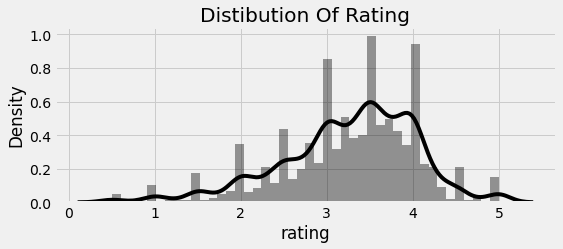

In [ ]:
# distibution plot
plt.figure(figsize=(8,3))
plt.style.use("fivethirtyeight")
sn.distplot(data['rating'], color="black")
plt.title("Distibution Of Rating")
plt.show()

In [ ]:
def strip_special_char(non_alpha:str):
    non_alpha = non_alpha.strip(")")
    non_alpha = non_alpha.strip("(")
    return non_alpha

In [ ]:
# extract year
data["title"] = data["title"].str.lstrip(" ")
data["title"] = data["title"].str.rstrip(" ")
temp = data["title"].str.split(" ")
data["year"] = temp.apply(lambda x: x[-1])
data["year"] = data["year"].apply(strip_special_char)
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [ ]:
# get all non int
def check_int_not(year):
    try:
        if isinstance(int(year), int):
            return True
    except Exception:
        return False

In [ ]:
data["int_or_not"] = data["year"].apply(check_int_not)
data.loc[data["int_or_not"]==False]

,title,genres,rating,year,int_or_not
3025,Hyena Road,(no genres listed),2.0,Road,False


In [ ]:
data.isnull().sum()

title         0
genres        0
rating        0
year          0
int_or_not    0
dtype: int64

In [ ]:
data.drop(["int_or_not"], inplace=True, axis=1)
del temp

In [ ]:
data["year"].replace("Road", "", inplace=True)
data.iloc[3025]

title             Hyena Road
genres    (no genres listed)
rating                   2.0
year                        
Name: 3025, dtype: object

In [ ]:
data["title"] = data["title"].str.lstrip(" ")
data["title"] = data["title"].str.rstrip(" ")
data["title"] = data["title"].str.split(' ')
data

,title,genres,rating,year
0,"['Hellboy':, The, Seeds, of, Creation, (2004)]",Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,"['Round, Midnight, (1986)]",Drama|Musical,3.500000,1986
2,"['Salem's, Lot, (2004)]",Drama|Horror|Mystery|Thriller,5.000000,2004
3,"['Til, There, Was, You, (1997)]",Drama|Romance,4.000000,1997
4,"['burbs,, The, (1989)]",Comedy,3.176471,1989
...,...,...,...,...
7067,"[eXistenZ, (1999)]",Action|Sci-Fi|Thriller,3.863636,1999
7068,"[xXx, (2002)]",Action|Crime|Thriller,2.770833,2002
7069,"[xXx:, State, of, the, Union, (2005)]",Action|Crime|Thriller,2.000000,2005
7070,"[¡Three, Amigos!, (1986)]",Comedy|Western,3.134615,1986


In [ ]:
data["title"] = data["title"].apply(lambda x: ' '.join(x[:-1]))

In [ ]:
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation,Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight,Drama|Musical,3.500000,1986
2,'Salem's Lot,Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You,Drama|Romance,4.000000,1997
4,"'burbs, The",Comedy,3.176471,1989
